In [1]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("PCAExample").getOrCreate()

23/10/20 19:20:54 WARN Utils: Your hostname, Sivas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.35 instead (on interface en0)
23/10/20 19:20:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/20 19:21:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
data = spark.read.csv("Date_Fruit_Datasets.csv", header=True, inferSchema=True)
feature_cols = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

In [4]:
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

In [5]:
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(data)
result = model.transform(data).select("pcaFeatures")

23/10/20 19:21:08 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/20 19:21:08 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
23/10/20 19:21:08 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [6]:
pca_data = result.collect()
x = [float(row.pcaFeatures[0]) for row in pca_data]
y = [float(row.pcaFeatures[1]) for row in pca_data]

23/10/20 19:21:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


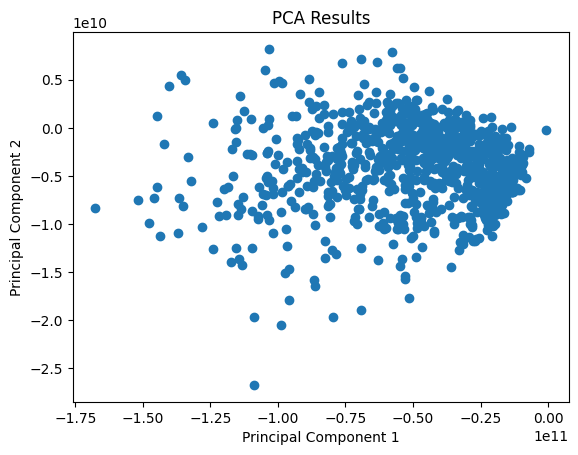

In [7]:
plt.scatter(x, y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Results")
plt.show()

In [8]:
explained_variance = model.explainedVariance
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {ratio}")

Explained Variance Ratios:
Principal Component 1: 0.9741192333682238
Principal Component 2: 0.019727595291484542
